In [17]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import re

In [42]:
targets = ["opencl", "cuda", "llvm"]
networks = ["mlp"]

Loaded ../benchmarks/mlp-4096-opencl-unoptimized.perf
Loaded ../benchmarks/mlp-8192-opencl-unoptimized.perf
Loaded ../benchmarks/mlp-32768-opencl-unoptimized.perf
Loaded ../benchmarks/mlp-16384-opencl-unoptimized.perf
Loaded ../benchmarks/mlp-4-opencl-unoptimized.perf
Loaded ../benchmarks/mlp-2-opencl-unoptimized.perf
Loaded ../benchmarks/mlp-1024-opencl-unoptimized.perf
Loaded ../benchmarks/mlp-16-opencl-unoptimized.perf
Loaded ../benchmarks/mlp-128-opencl-unoptimized.perf
Loaded ../benchmarks/mlp-512-opencl-unoptimized.perf
Loaded ../benchmarks/mlp-32-opencl-unoptimized.perf
Loaded ../benchmarks/mlp-65536-opencl-unoptimized.perf
Loaded ../benchmarks/mlp-64-opencl-unoptimized.perf
Loaded ../benchmarks/mlp-2048-opencl-unoptimized.perf
Loaded ../benchmarks/mlp-8-opencl-unoptimized.perf
Loaded ../benchmarks/mlp-1-opencl-unoptimized.perf
Loaded ../benchmarks/mlp-256-opencl-unoptimized.perf
[ 4096  8192 32768 16384     4     2  1024    16   128   512    32 65536
    64  2048     8     1   

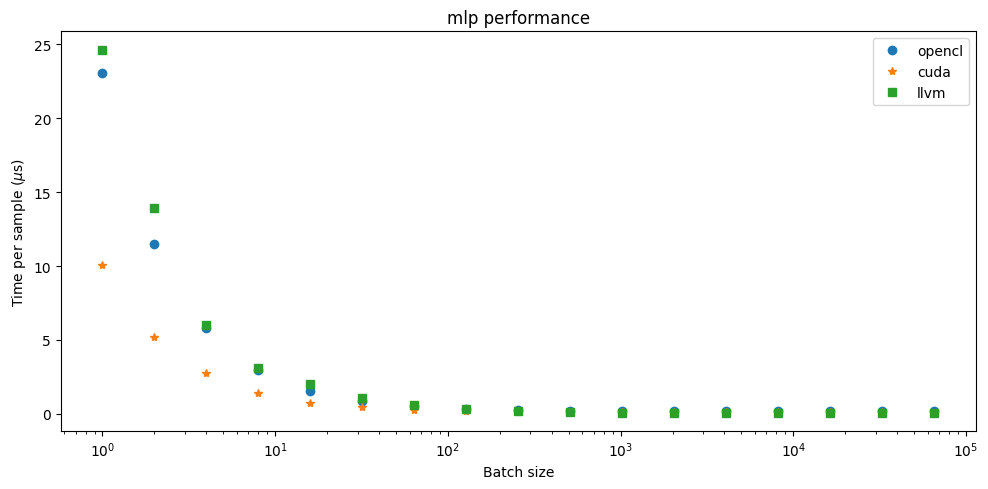

In [60]:
fig , ax = plt.subplots(figsize=(10, 5))
for i, network in enumerate(networks):
    for j, target in enumerate(targets):
        files = glob.glob(f'../benchmarks/{network}*{target}*d.perf')
        batch_size = []
        data = []
        for file in files:
            data.append(np.loadtxt(file, delimiter=','))
            print(f"Loaded {file}")
            batch_size.append(int(re.findall(r'\d+', file)[0]))
        data = np.array(data)
        batch_size = np.array(batch_size)
        print(batch_size)
        print(data)
        ax.plot(batch_size, np.mean(data, axis=1)/batch_size*1e6, ['o','*','s'][j], label=target)
ax.set_title(f"{network} performance")
ax.legend()
ax.set_xlabel("Batch size")
ax.set_ylabel(r"Time per sample ($\mu$s)")
ax.set_xscale('log')
plt.tight_layout()
plt.show()

Loaded ../benchmarks/mlp-8192-opencl-unoptimized-data_transfer.perf
Loaded ../benchmarks/mlp-16384-opencl-unoptimized-data_transfer.perf
Loaded ../benchmarks/mlp-8-opencl-unoptimized-data_transfer.perf
Loaded ../benchmarks/mlp-4-opencl-unoptimized-data_transfer.perf
Loaded ../benchmarks/mlp-1-opencl-unoptimized-data_transfer.perf
Loaded ../benchmarks/mlp-128-opencl-unoptimized-data_transfer.perf
Loaded ../benchmarks/mlp-512-opencl-unoptimized-data_transfer.perf
Loaded ../benchmarks/mlp-64-opencl-unoptimized-data_transfer.perf
Loaded ../benchmarks/mlp-65536-opencl-unoptimized-data_transfer.perf
Loaded ../benchmarks/mlp-32-opencl-unoptimized-data_transfer.perf
Loaded ../benchmarks/mlp-16-opencl-unoptimized-data_transfer.perf
Loaded ../benchmarks/mlp-2-opencl-unoptimized-data_transfer.perf
Loaded ../benchmarks/mlp-1024-opencl-unoptimized-data_transfer.perf
Loaded ../benchmarks/mlp-256-opencl-unoptimized-data_transfer.perf
Loaded ../benchmarks/mlp-32768-opencl-unoptimized-data_transfer.per

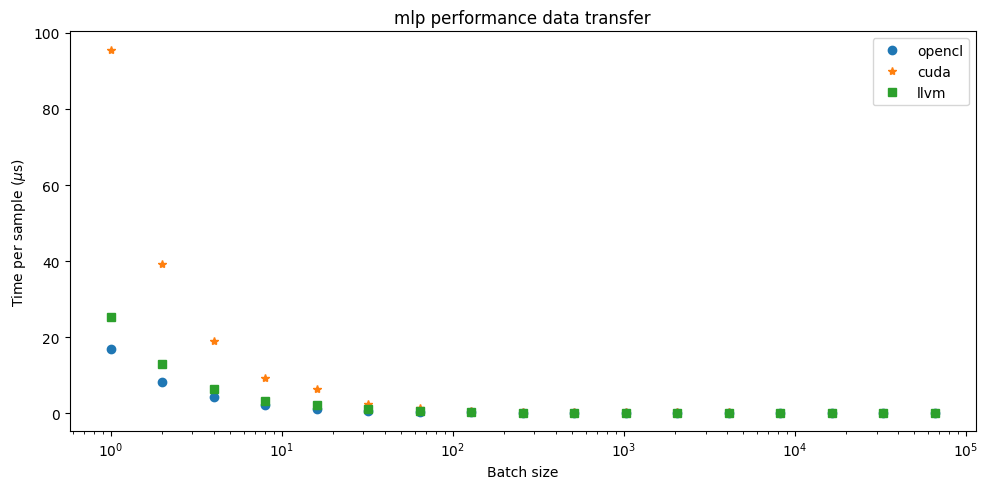

In [62]:
fig , ax = plt.subplots(figsize=(10, 5))
for i, network in enumerate(networks):
    for j, target in enumerate(targets):
        files = glob.glob(f'../benchmarks/{network}*{target}*transfer.perf')
        batch_size = []
        data = []
        for file in files:
            data.append(np.loadtxt(file, delimiter=','))
            print(f"Loaded {file}")
            batch_size.append(int(re.findall(r'\d+', file)[0]))
        data = np.array(data)
        batch_size = np.array(batch_size)
        print(batch_size)
        print(data)
        ax.plot(batch_size, np.mean(data, axis=1)/batch_size*1e6, ['o','*','s'][j], label=target)
ax.set_title(f"{network} performance data transfer")
ax.legend()
ax.set_xlabel("Batch size")
ax.set_ylabel(r"Time per sample ($\mu$s)")
ax.set_xscale('log')
plt.tight_layout()
plt.show()

In [ ]:
def curve_calc(arr, procent_data):
    data = np.arange(1, len(arr)+1)/len(arr)
    cut = np.where(data > procent_data)[0][0]
    return data, arr[cut]


def plot_curve(arr, procent_data, plot_file=f"plots/{args.network}-{args.target}"):
    data, cut = curve_calc(arr, procent_data)
    plt.grid()
    plt.plot(arr,data)
    plt.plot([cut]*2,[0,1], 'r--')
    plt.xlabel("Cut distance")
    plt.ylabel("Procent of data")
    plt.savefig(plot_file+".png", dpi=300)
    plt.show()
